# Estudo sobre o algoritmo KNN

O algoritmo KNN faz a classificação com base na distância. Para uma entrada teste X, atribui-se o rótulo mais comum entre suas K entradas de treinamento mais semelhantes

In [15]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

In [7]:
iris_data = datasets.load_iris()
X = iris_data.data
y = iris_data.target
target_names = iris_data.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

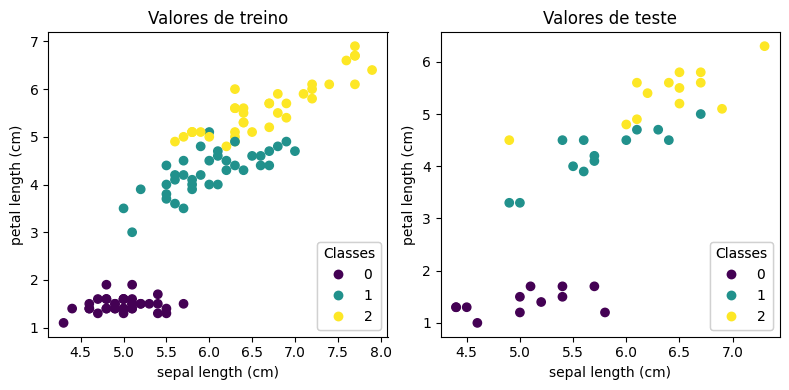

In [25]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

# gráfico: valores de treino
scatter1 = ax1.scatter(X_train[:, 0], X_train[:, 2], c=y_train, cmap='viridis')
ax1.set(xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[2])
ax1.set_title('Valores de treino')
legend1 = ax1.legend(*scatter1.legend_elements(), loc="lower right", title="Classes")
ax1.add_artist(legend1)

# gráfico: valores teste
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 2], c=y_test, cmap='viridis')
ax2.set(xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[2])
ax2.set_title('Valores de teste')
legend2 = ax2.legend(*scatter2.legend_elements(), loc="lower right", title="Classes")
ax2.add_artist(legend2)

plt.tight_layout()  # Ajusta o layout para que os subplots não se sobreponham
plt.show()

# Que função de distância devemos usar?

Os classificadores KNN dependem fundamentalmente de uma métrica de distância. Quanto melhor essa métrica refletir a similaridade do rótulo, melhor será a classificação.

# Qual o valor de K?

Dependendo do valor de K com a distribuição dos dados de treinamento, podemos ter classificações diferentes para valores de K diferentes.

<img src='https://miro.medium.com/v2/resize:fit:1358/0*jqxx3-dJqFjXD6FA'></img>

In [19]:
# testando diferentes valores de k
K = [3, 5, 7, 9, 11]
for k in K:
  params = {'n_neighbors': k,
            'weights': 'uniform',
            'algorithm': 'auto',
            'p': 2, # Euclidean,
            'n_jobs': -1
            }

  knn = KNeighborsClassifier(**params)
  knn.fit(X_train[:, [0,2]], y_train)

  y_pred_train = knn.predict(X_train[:, [0,2]])
  y_pred_test = knn.predict(X_test[:, [0,2]])

  print(f"K = {k}")
  print(f"train acc.: {round(accuracy_score(y_train, y_pred_train),2)}")
  print(f"test acc.: {round(accuracy_score(y_test, y_pred_test),2)}\n\n")


K = 3
train acc.: 0.97
test acc.: 0.92


K = 5
train acc.: 0.98
test acc.: 0.95


K = 7
train acc.: 0.97
test acc.: 0.92


K = 9
train acc.: 0.97
test acc.: 0.92


K = 11
train acc.: 0.96
test acc.: 0.92




  Dessa forma, o melhor K é K=5 pois mostra o melhor equilíbrio nas métricas entre treino e teste

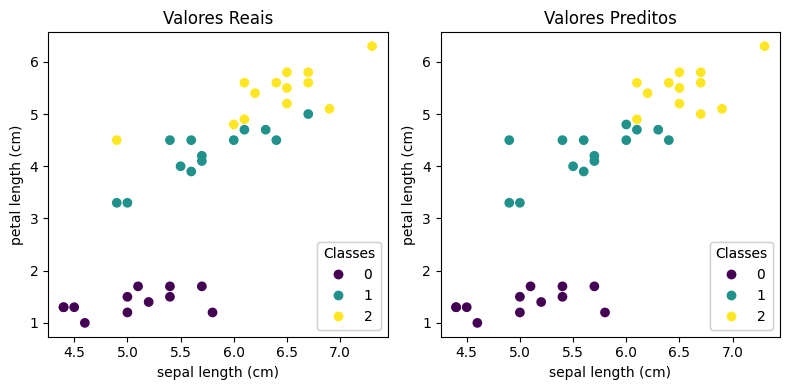

In [23]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8, 4))

# gráfico: valores reais
scatter1 = ax1.scatter(X_test[:, 0], X_test[:, 2], c=y_test, cmap='viridis')
ax1.set(xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[2])
ax1.set_title('Valores Reais')
legend1 = ax1.legend(*scatter1.legend_elements(), loc="lower right", title="Classes")
ax1.add_artist(legend1)

# gráfico: valores preditos
scatter2 = ax2.scatter(X_test[:, 0], X_test[:, 2], c=y_pred_test, cmap='viridis')
ax2.set(xlabel=iris_data.feature_names[0], ylabel=iris_data.feature_names[2])
ax2.set_title('Valores Preditos')
legend2 = ax2.legend(*scatter2.legend_elements(), loc="lower right", title="Classes")
ax2.add_artist(legend2)

plt.tight_layout()  # Ajusta o layout para que os subplots não se sobreponham
plt.show()